In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
%matplotlib inline
import scipy as sp
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
import os
import glob

import itertools
import operator
import string
#from Bio import AlignIO

In [8]:
#####Create nested list of DFEs from Johri et al. 2021 (MBE)#####
DFE = [[0.1,0.7,0.1,0.1],
      [0.1,0.1,0.7,0.1],
      [0.1,0.1,0.1,0.7],
      [0.25,0.25,0.25,0.25],
      [0.5,0,0,0.5],
      [0.7,0,0,0.3]]

In [7]:
#####Function to get discreet DFE from gamma#####
def get_DFE_proportions(shape, scale, categories):
    res = []
    num = np.random.gamma(shape = shape, scale = scale, size = 1000000)
    #Effectively neutral
    res.append(len(num[(num > categories[0]) & (num <= categories[1])])/1000000)
    #Weakly deleterious
    res.append(len(num[(num > categories[1]) & (num <= categories[2])])/1000000)
    #Moderately deleterious
    res.append(len(num[(num > categories[2]) & (num <= categories[3])])/1000000)
    #Strongly deleterious
    res.append(len(num[(num > categories[3]) & (num <= categories[4])])/1000000)
    return(res)

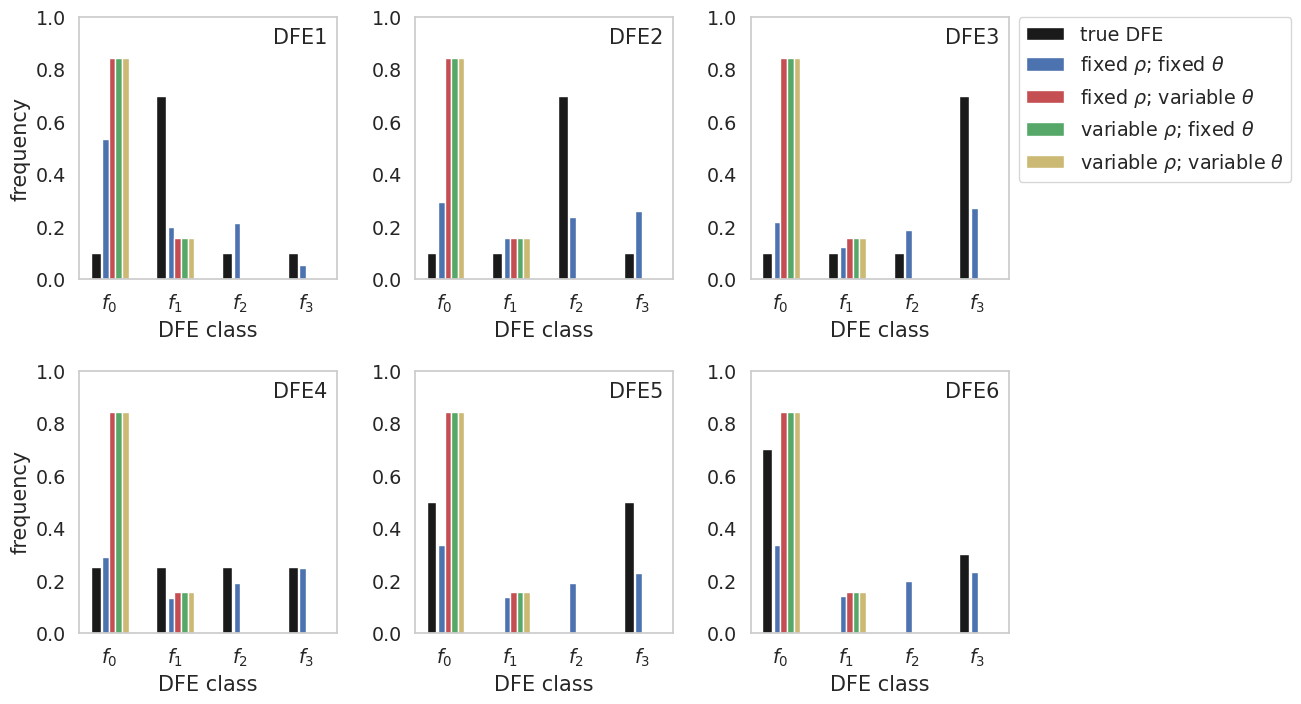

In [19]:
#####Plot Grapes results#####
infDFE = []
for m in ['rr_fixed_mu_fixed', 'rr_fixed_mu_variable', 'rr_variable_mu_fixed', 'rr_variable_mu_variable']:
    res = []
    df = pd.DataFrame()
    for sim in range(1, 7):
        for i in range(1, 11):
            df2 = pd.read_csv('/home/vivak/rr_mu_demog_inference/DFE_inference/results/cc/'+m+'/127_sim' +
                        str(sim) + '_run' + str(i) + '.out', sep=',', header=0)
            df2['DFE'] = i
            df2 = df2[['DFE', 'model', 'lnL', 'GammaZero:negGmean', 'GammaZero:negGshape', 'theta']]
            df = pd.concat([df, df2])
            df['scale'] = df['GammaZero:negGmean'] / df['GammaZero:negGshape']
        res.append([sim, df['GammaZero:negGshape'].mean(), df['GammaZero:negGmean'].mean(), df['scale'].mean(),
                    df['theta'].mean()])

    df = pd.DataFrame(res, columns = ['DFE', 'g_shape', 'g_mean', 'g_scale', 'theta'])
#     infDFE.append(df.apply(lambda x: get_DFE_proportions(x['g_shape'], x['g_scale'], [0, 2, 20, 200, 2000]), axis=1))
    infDFE.append(df.apply(lambda x: get_DFE_proportions(x['g_shape'], x['g_scale'], [0, 2, 20, 200, 2000]), axis=1))


sns.set(rc={'figure.figsize':(12,8),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
x = [a for a in range(0,4)]
for i in range(0, 6):
    ax = plt.subplot(2, 3, i+1)
    ax.bar([a-0.45 for a in x], DFE[i], width=0.15, color='k', align='center', label='true DFE')
    ax.bar([a-0.3 for a in x], infDFE[0][i], width=0.1, color='b', align='center', 
           label=r'fixed ' + u'$\u03C1$;' + ' fixed ' + r'$\theta$')
    ax.bar([a-0.2 for a in x], infDFE[1][i], width=0.1, color='r', align='center', 
           label=r'fixed ' + u'$\u03C1$;' + ' variable ' + r'$\theta$')
    ax.bar([a-0.1 for a in x], infDFE[2][i], width=0.1, color='g', align='center', 
           label=r'variable ' + u'$\u03C1$;' + ' fixed ' + r'$\theta$')
    ax.bar(x, infDFE[3][i], width=0.1, color='y', align='center', 
           label=r'variable ' + u'$\u03C1$;' + ' variable ' + r'$\theta$')
    plt.xticks([-0.25,0.75,1.75,2.75], [r'$f_0$', r'$f_1$', r'$f_2$', r'$f_3$'])
    plt.xlabel("DFE class")
    if(i==2):
        ax.legend(bbox_to_anchor=(1, 1.035))
    ax.set_ylim([0,1])   
    if((i==0) | (i==3)):
        ax.set_ylabel('frequency')
        
    ax.text(s='DFE' + str(i+1), x=2.25, y=0.9)
    
plt.subplots_adjust(wspace=0.3, hspace=0.35)

plt.savefig('/home/vivak/rr_mu_demog_inference/plots/figS28.tiff', format='tiff', dpi=300, bbox_inches='tight')

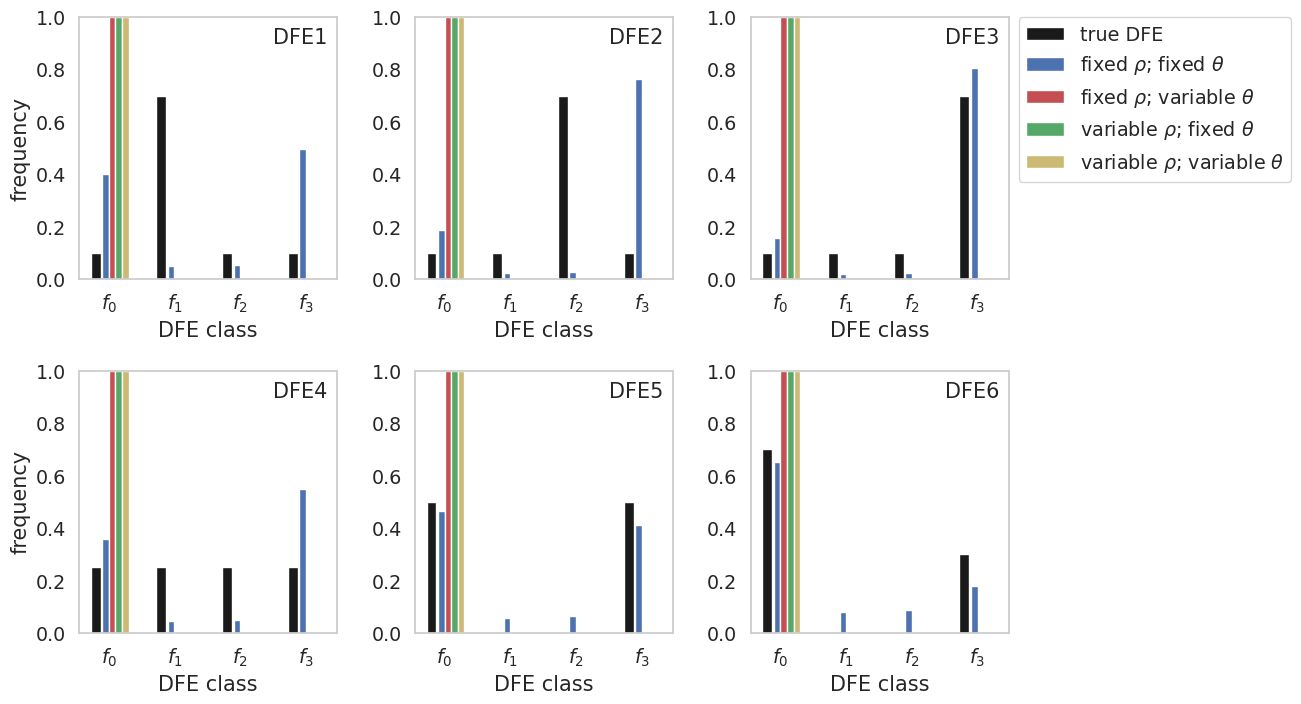

In [18]:
#####Plot DFE-alpha results#####
infDFE = []
for m in ['rr_fixed_mu_fixed', 'rr_fixed_mu_variable', 'rr_variable_mu_fixed', 'rr_variable_mu_variable']:
    df = pd.read_csv('/home/vivak/rr_mu_demog_inference/DFE_inference/DFEalpha/results/cc/'+m+'.txt', sep='\t', 
               names=['sim', 'run','f0', 'f1', 'f2', 'f3'])

    df = df.groupby('sim').mean().reset_index()
    infDFE.append(np.array(df[['f0','f1','f2','f3']]))

sns.set(rc={'figure.figsize':(12,8),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.25)
x = [a for a in range(0,4)]
for i in range(0, 6):
    ax = plt.subplot(2, 3, i+1)
    ax.bar([i-0.45 for i in x], DFE[i], width=0.15, color='k', align='center', label='true DFE')
    ax.bar([i-0.3 for i in x], infDFE[0][i], width=0.1, color='b', align='center', 
           label=r'fixed ' + u'$\u03C1$;' + ' fixed ' + r'$\theta$')
    ax.bar([i-0.2 for i in x], infDFE[1][i], width=0.1, color='r', align='center', 
           label=r'fixed ' + u'$\u03C1$;' + ' variable ' + r'$\theta$')
    ax.bar([i-0.1 for i in x], infDFE[2][i], width=0.1, color='g', align='center', 
           label=r'variable ' + u'$\u03C1$;' + ' fixed ' + r'$\theta$')
    ax.bar(x, infDFE[3][i], width=0.1, color='y', align='center', 
           label=r'variable ' + u'$\u03C1$;' + ' variable ' + r'$\theta$')

#         ax.set_xticks([-1,0,1,2], 
#                    [r'$0 \leq 2N_es < 1$', r'$1 \leq 2N_es < 10$', r'$10 \leq 2N_es < 100$', r'$100 \leq 2N_es < 1000$'], 
#                rotation=45)
    plt.xticks([-0.25,0.75,1.75,2.75], [r'$f_0$', r'$f_1$', r'$f_2$', r'$f_3$'])
    plt.xlabel("DFE class")
    if(i==2):
        ax.legend(bbox_to_anchor=(1, 1.035))
    ax.set_ylim([0,1])   
    if((i==0) | (i==3)):
        ax.set_ylabel('frequency')
        
    ax.text(s='DFE' + str(i+1), x=2.25, y=0.9)
    
plt.subplots_adjust(wspace=0.3, hspace=0.35)
plt.savefig('/home/vivak/rr_mu_demog_inference/plots/figS27.tiff', format='tiff', dpi=300, bbox_inches='tight')